In [ ]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )


In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)
train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)


print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


#### k-최근접 이웃 알고리즘의 문제점<hr>
k-최근접 이웃 회귀는 가장 가까운 샘플을 찾아 타깃을 평균합니다.
따라서 새로운 샘플이 훈련세트 범위를 벗어나면 엉뚱한 값을 예측할 수 있습니다.
이런 식이면 농어가 아무리 커도 무게가 더 늘어나지 않겠군.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)
knr.score(train_input, train_target), knr.score(test_input, test_target)

(0.9804899950518966, 0.9746459963987609)

In [ ]:
print(knr.predict([[50]]))

[1033.33333333]


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# 50cm 농어의 가장 가까운 이웃 3개
distances, indexes = knr.kneighbors([[50]])
print(distances, indexes)

[[6. 7. 7.]] [[34  8 14]]


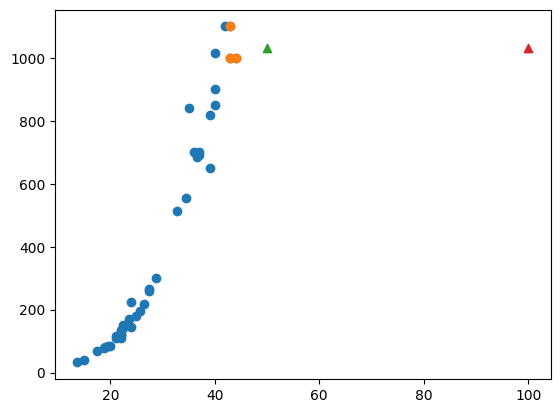

In [ ]:
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes])
# 이런 식이면 농어가 아무리 커도 무게가 동일하겠군.
plt.scatter(50, 1033, marker='^')
plt.scatter(100, 1033, marker='^')
plt.show()

#### 선형회귀로 예측하기<hr>
lnear_regerssion = lr<br>
```lr.coef_``` : 기울기(weight) <br>
```lr.intercept_``` : 절편, 편향(bias)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(train_input, train_target)

lr.predict([[50]])

array([1241.83860323])

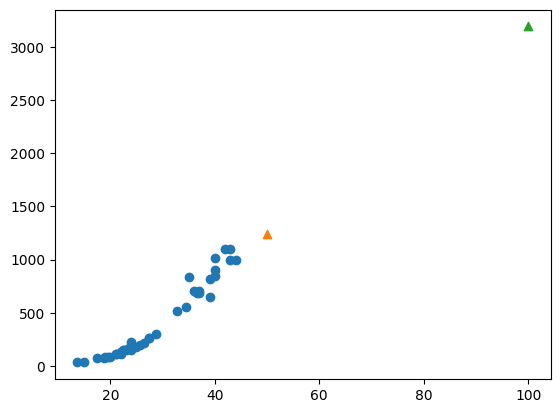

In [ ]:
plt.scatter(train_input, train_target)
plt.scatter(50, 1241, marker='^')
plt.scatter(100, 3192, marker='^')
plt.show()

In [ ]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


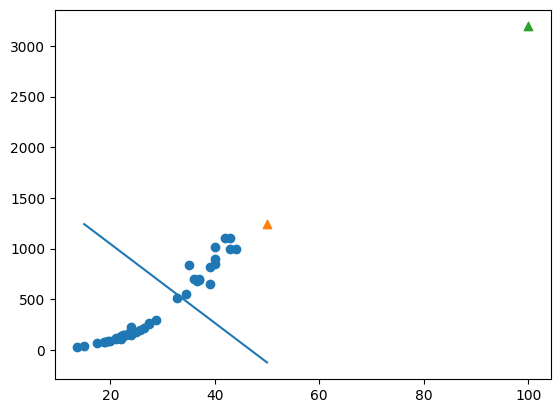

In [ ]:
plt.scatter(train_input, train_target)
plt.plot([15, 50], [lr.coef_*50 + lr.intercept_, lr.coef_*15 + lr.intercept_])
plt.scatter(50, 1241, marker='^')
plt.scatter(100, 3192, marker='^')
plt.show()

In [ ]:
lr.score(train_input, train_target), lr.score(test_input, test_target)

(0.939846333997604, 0.8247503123313558)

In [ ]:
# 특성을 새로 만들어내는 것 : 특성공학

train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

print((train_poly.shape, test_poly.shape))

((42, 2), (14, 2))


In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


In [ ]:
lr.predict([[50**2, 50]])

array([1573.98423528])

In [ ]:
lr.score(test_poly, test_target)

0.9775935108325122

#### 다항회귀로 예측하기<hr>
다항회귀(2차방정식)도 선형회귀인 이유 : 선형관계(1차방정식(x^2 => X, y)로 나타낼 수 있음)를 가진다.

In [ ]:
pt = np.arange(15,50)

In [ ]:
pred = lr.coef_[0]*(pt**2)+lr.coef_[1]*pt+lr.intercept_
pred

array([  20.90606071,   30.79243112,   42.70746575,   56.6511646 ,
         72.62352767,   90.62455496,  110.65424646,  132.71260219,
        156.79962213,  182.91530629,  211.05965467,  241.23266727,
        273.43434409,  307.66468513,  343.92369038,  382.21135986,
        422.52769355,  464.87269146,  509.24635359,  555.64867994,
        604.07967051,  654.5393253 ,  707.0276443 ,  761.54462753,
        818.09027497,  876.66458663,  937.26756251,  999.89920261,
       1064.55950693, 1131.24847547, 1199.96610822, 1270.7124052 ,
       1343.48736639, 1418.2909918 , 1495.12328143])

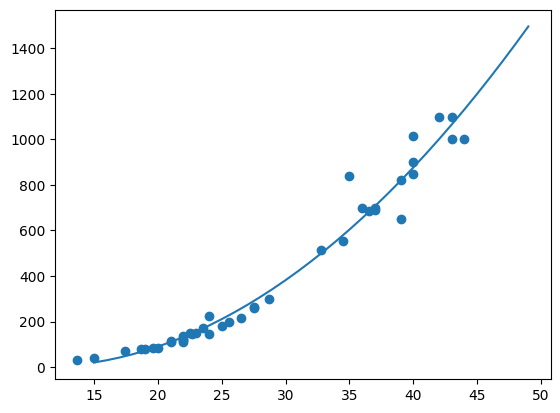

In [ ]:
plt.scatter(train_input, train_target)
plt.plot(pt, pred)
plt.show()